<a href="https://colab.research.google.com/github/doSwayamCode/ml-daily/blob/main/standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df =pd.read_csv('/content/Social_Network_Ads.csv')

In [28]:
df= df.iloc[:, 2:]

In [29]:
df.sample(5)

,Age,EstimatedSalary,Purchased
91,30,116000,0
233,49,86000,1
139,19,25000,0
148,29,61000,0
192,29,43000,0


In [30]:
# train test split (recommended)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                     df['Purchased'],
                                                     test_size=0.3,
                                                     random_state =0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [31]:
# standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [34]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [35]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scaling')

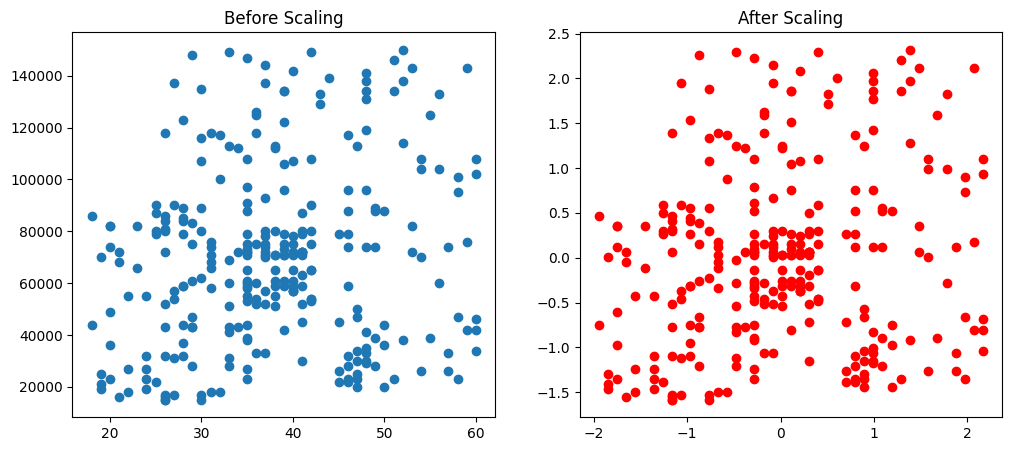

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

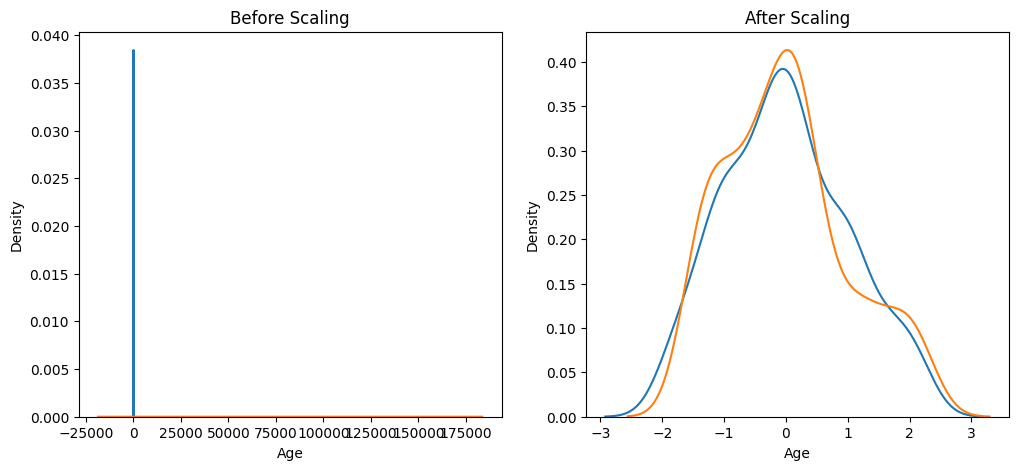

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

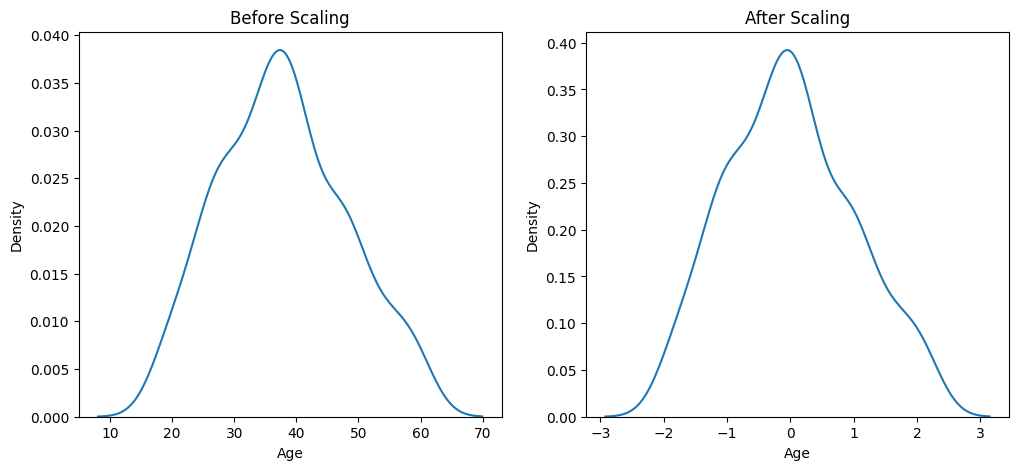

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [39]:
# why scaling is important?

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [50]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


In [51]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [53]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [54]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


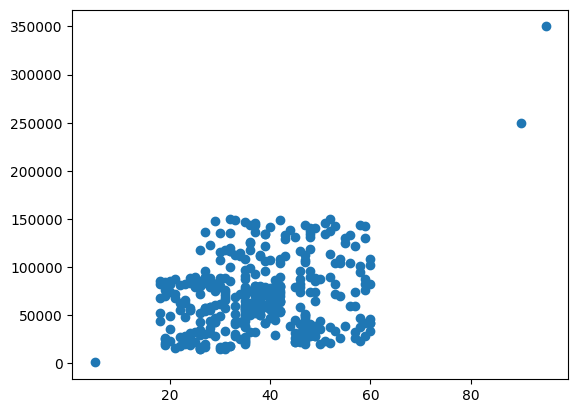

In [55]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

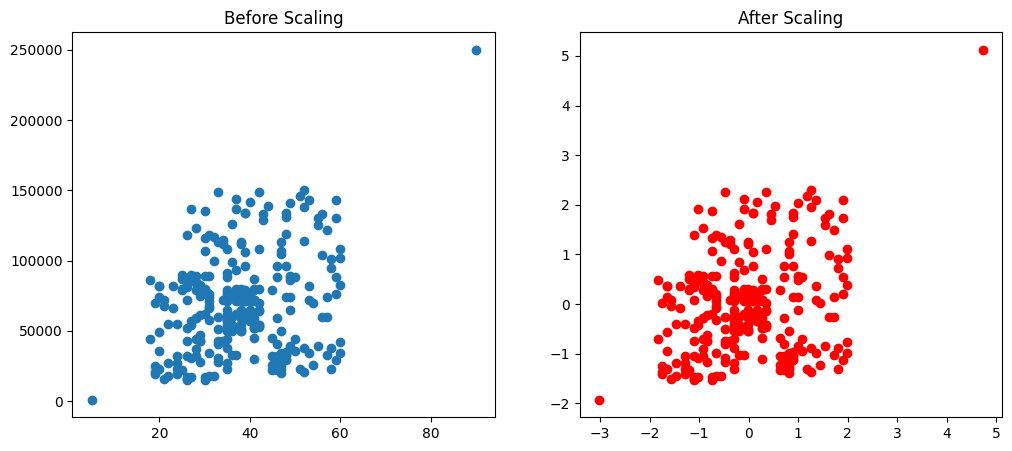

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()